In [216]:
import covasim as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [150]:
start_day = '2020-03-02'
end_day   = '2020-07-01'
all_days = cv.date_range(start_day, end_day)
beta_initial=0.015

In [197]:
# defining a moving beta accoding to the article predicting regional covid 19 hospital admissions in Sweden using mobility data

mobility='''0
-0,0436877025562212
-0,142183890633573
-0,414264196497882
-0,490226517606742
-0,520691444229291
-0,601104998394856
-0,565468289968282
-0,500887028474234
-0,533539503417897
-0,489363271950639
-0,479732407975015
-0,525650201055078
-0,4254
-0,4325
-0,394
-0,53
-0,47
-0,5
-0,53
-0,56
-0,55
-0,53
-0,5
-0,47
-0,39
-0,35
-0,34
-0,34
-0,33
-0,33
-0,32
-0,31
-0,32
-0,31
-0,42
-0,41
-0,43
-0,45
-0,44
-0,44
-0,51
-0,51
-0,66
-0,77
'''.replace(',','.').split('\n')


floatmobility = [float(i) for i in mobility if i != '']
betas = [ 4.11 + 6.68 * mob for mob in floatmobility]
betas_by_week=np.array([betas[i//7] for i in range(len(all_days))])
# coeff_betas=[betas_by_week[i+1]/betas_by_week[i] for i in range(len(betas_by_week)-1)]
coeff_betas=[betas_by_week[i]/beta_initial for i in range(len(betas_by_week))]


In [201]:
parameters_sweden=dict(pop_size=1000000,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                                             # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

                            start_day = start_day,
                            end_day   = end_day,
                            pop_type = 'hybrid',
                            beta=beta_initial,  # value to change. There seems to be a problem, as when 
                            # I change the value of beta to 0.15, the curve drastically change when it shoudln't. 
                            # with several tries, it seems that the model begins with a value of beta equal to 1. 
                            location = 'Sweden',
                            pop_infected = 20, #value by default, TOCHANGE
                            
                            )




In [202]:
# interventions of changing beta
cb_mobility = cv.change_beta(days=all_days, changes=coeff_betas, do_plot=False) # warning, change_beta does not change the value of beta, it multiplies the value of beta_0 by a constant and replaces the previois beta by this new one. 
beta_low=0.5
beta_high=1.2
cb_two_waves=cv.change_beta(days=['2020-03-02', '2020-04-20', '2020-05-25', '2020-06-25', ], changes=[beta_high, beta_low, beta_high, beta_low], do_plot=True)

Initializing sim with 1000000 people for 121 days
Loading location-specific data for "Sweden"
  Running 2020-03-02 ( 0/121) (10.57 s)  ———————————————————— 1%
  Running 2020-03-12 (10/121) (13.29 s)  •——————————————————— 9%
  Running 2020-03-22 (20/121) (20.24 s)  •••————————————————— 17%
  Running 2020-04-01 (30/121) (29.82 s)  •••••——————————————— 25%
  Running 2020-04-11 (40/121) (39.58 s)  ••••••—————————————— 34%
  Running 2020-04-21 (50/121) (48.68 s)  ••••••••———————————— 42%
  Running 2020-05-01 (60/121) (57.10 s)  ••••••••••—————————— 50%
  Running 2020-05-11 (70/121) (66.94 s)  •••••••••••————————— 58%
  Running 2020-05-21 (80/121) (76.98 s)  •••••••••••••——————— 66%
  Running 2020-05-31 (90/121) (87.38 s)  ••••••••••••••—————— 75%
  Running 2020-06-10 (100/121) (97.07 s)  ••••••••••••••••———— 83%
  Running 2020-06-20 (110/121) (106.40 s)  ••••••••••••••••••—— 91%
  Running 2020-06-30 (120/121) (115.27 s)  •••••••••••••••••••— 99%
Simulation summary:
    5,702,320 cumulative 

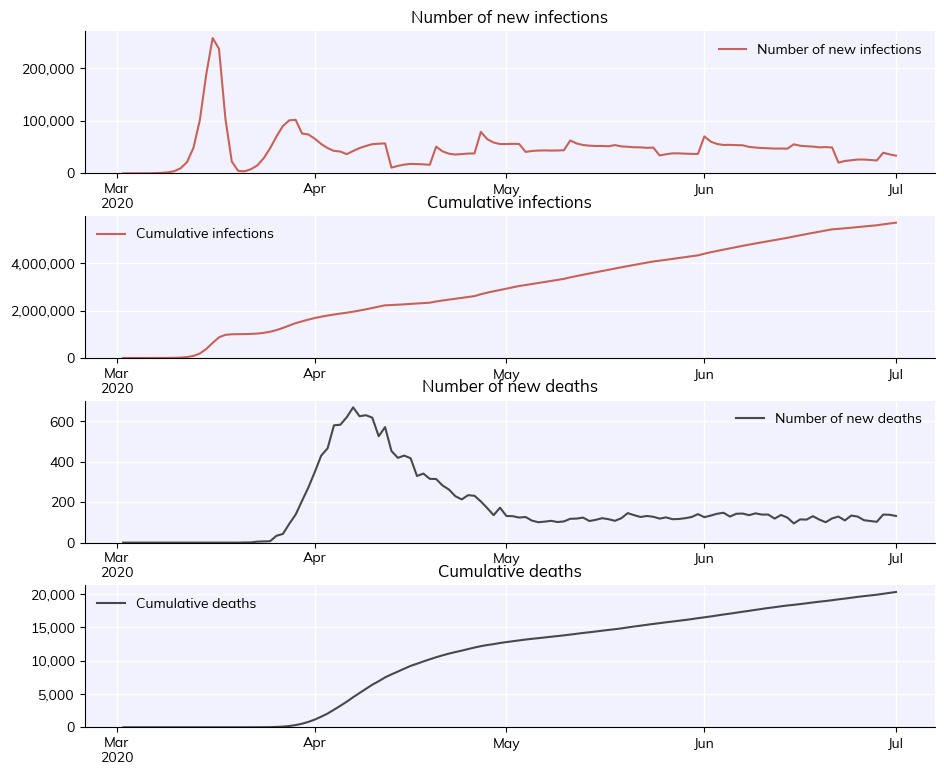

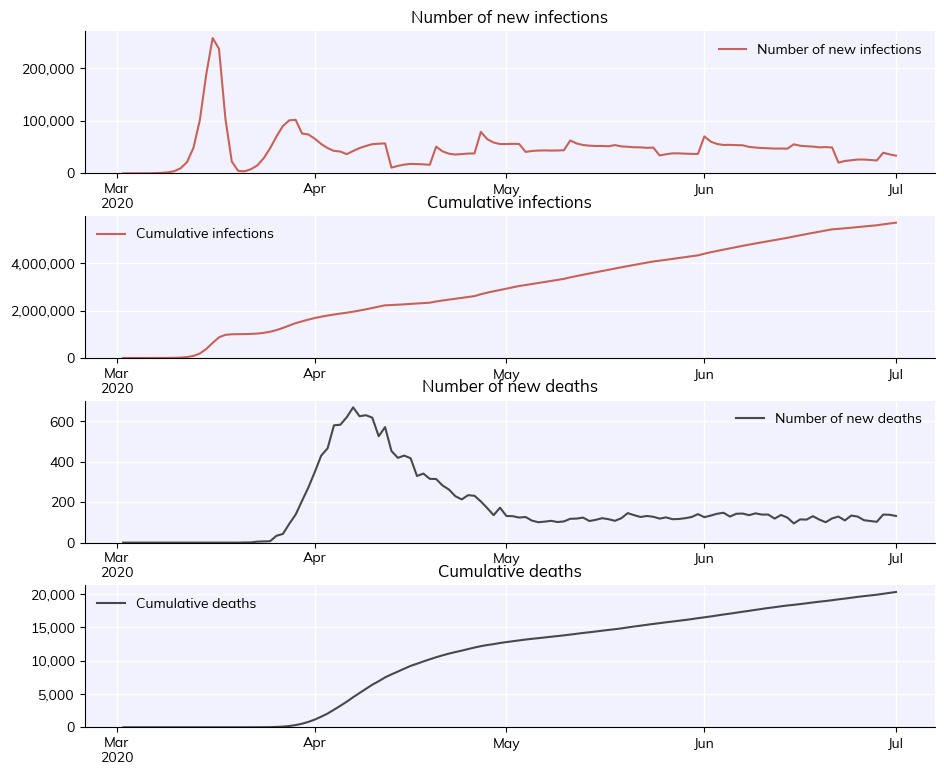

In [203]:
my_simulation_sweden_interventions=cv.Sim(parameters_sweden, interventions=cb_mobility)
my_simulation_sweden_interventions.run()
my_simulation_sweden_interventions.plot([ 'new_infections', 'cum_infections', 'new_deaths', 'cum_deaths'])


In [214]:
new_deaths=np.array(my_simulation_sweden_interventions.results['new_deaths'])
n_infected=np.array(my_simulation_sweden_interventions.results['n_infectious'])

In [217]:
pd.DataFrame({'new_deaths':new_deaths, 'n_infected':n_infected}).to_csv('deaths_and_infections.csv')

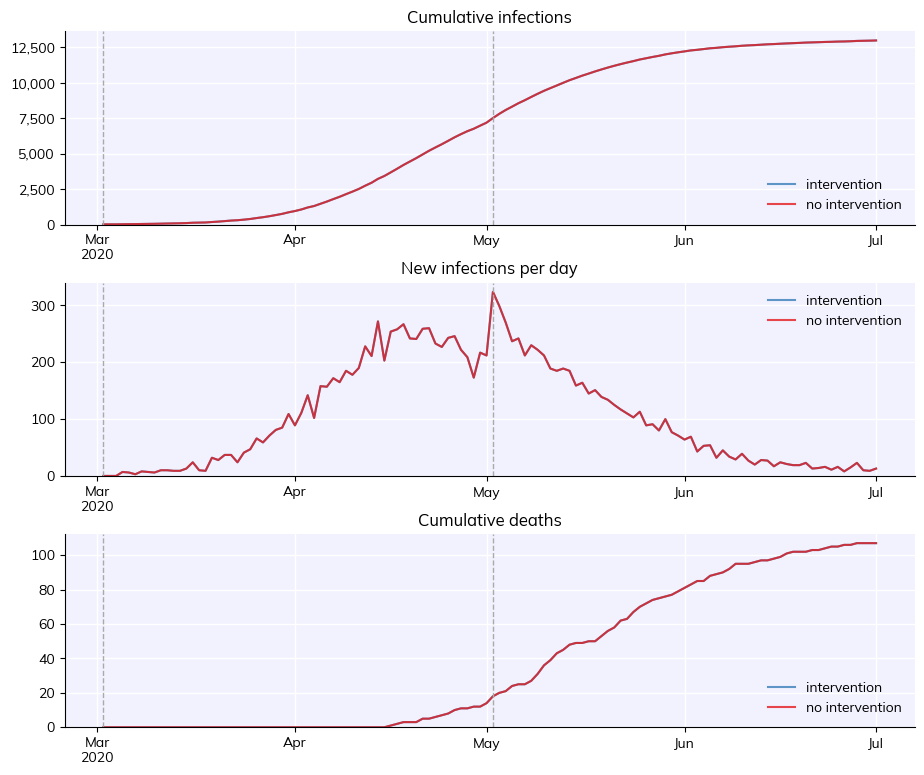

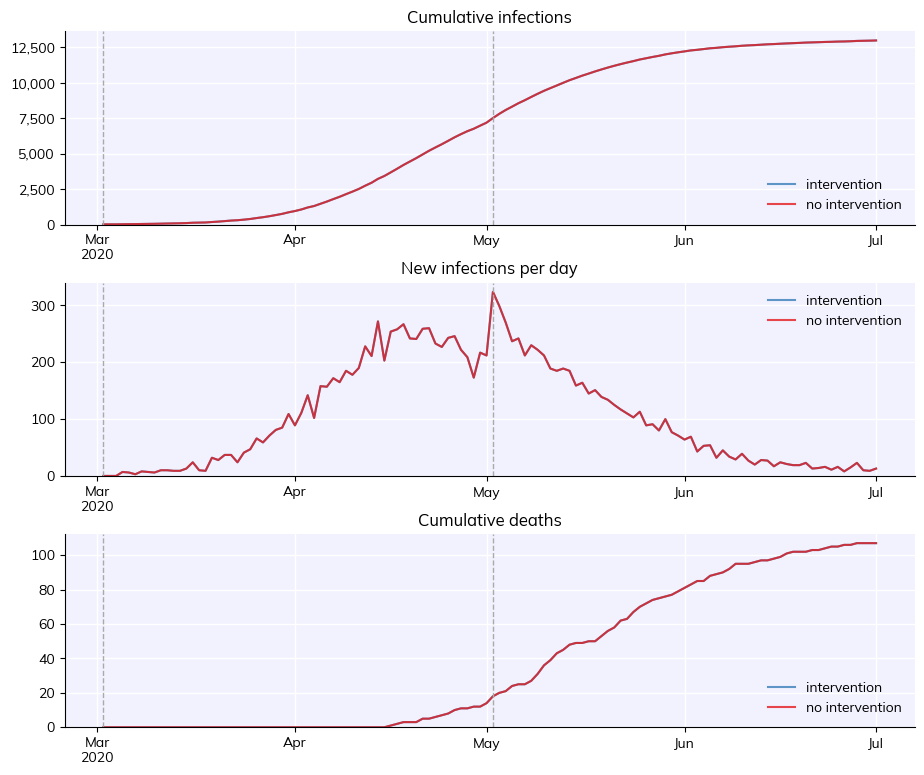

In [145]:
# THIS CELLE ENABLES TO CHECK WHAT change_beta REALLY DOES






param1=dict(pop_size=10000,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                                             # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

                            start_day = start_day,
                            end_day   = end_day,
                            pop_type = 'hybrid',
                            beta=0.015,  # value to change. There seems to be a problem, as when 
                            # I change the value of beta to 0.15, the curve drastically change when it shoudln't. 
                            # with several tries, it seems that the model begins with a value of beta equal to 1. 
                            location = 'Sweden',
                            pop_infected = 20, #value by default, TOCHANGE
                            
                            )


param2=dict(pop_size=10000,  #  10 368 969 is population in Sweden in 2019 according to https://www.worldometers.info/ 
                                             # 1608037 is the population in Stockholm in 2019 according to https://worldpopulationreview.com/

                            start_day = start_day,
                            end_day   = end_day,
                            pop_type = 'hybrid',
                            beta=1,  # value to change. There seems to be a problem, as when 
                            # I change the value of beta to 0.15, the curve drastically change when it shoudln't. 
                            # with several tries, it seems that the model begins with a value of beta equal to 1. 
                            location = 'Sweden',
                            pop_infected = 20, #value by default, TOCHANGE
                            
                            )




cb1=cv.change_beta(days=['2020-03-02',  '2020-05-02',  ], changes=[1, 2], do_plot=True)
cb2=cv.change_beta(days=['2020-03-02',  '2020-05-02',  ], changes=[0.015, 0.03], do_plot=True)

sim1=cv.Sim(param1, interventions=cb1, label='intervention')
sim2=cv.Sim(param2, interventions=cb2, label='no intervention')
msim=cv.MultiSim([sim1, sim2])
msim.run()
msim.plot()

